# Рабочая тетрадь No 3

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer

### 1.3.1 Задание

Задайте 4 точки в трехмерном пространстве, рассчитайте между ними 
расстояния по описанным в примере выше метрикам. Отобразите точки 
в трехмерном пространстве.

In [4]:
first_dot = np.array([np.random.randint(10) for _ in range(3)])
second_dot = np.array([np.random.randint(10) for _ in range(3)])
third_dot = np.array([np.random.randint(10) for _ in range(3)])
fourth_dot = np.array([np.random.randint(10) for _ in range(3)])

dots = [first_dot, second_dot, third_dot, fourth_dot]

In [5]:
for first in dots:
    for second in dots:
        if (first == second).all():
            continue

        print(first, second)
        print('Расстояние Евклида', np.linalg.norm(first-second))
        print('Квадрат Евклидова расстояния', np.linalg.norm(first-second) ** 2)
        print('Расстояние Чебышева', np.linalg.norm(first-second, ord=np.inf))
        print('Расстояние Хемминга', np.linalg.norm(first-second, ord=1))
        print()

[2 4 8] [8 6 2]
Расстояние Евклида 8.717797887081348
Квадрат Евклидова расстояния 76.00000000000001
Расстояние Чебышева 6.0
Расстояние Хемминга 14.0

[2 4 8] [6 6 1]
Расстояние Евклида 8.306623862918075
Квадрат Евклидова расстояния 69.0
Расстояние Чебышева 7.0
Расстояние Хемминга 13.0

[2 4 8] [7 6 1]
Расстояние Евклида 8.831760866327848
Квадрат Евклидова расстояния 78.00000000000001
Расстояние Чебышева 7.0
Расстояние Хемминга 14.0

[8 6 2] [2 4 8]
Расстояние Евклида 8.717797887081348
Квадрат Евклидова расстояния 76.00000000000001
Расстояние Чебышева 6.0
Расстояние Хемминга 14.0

[8 6 2] [6 6 1]
Расстояние Евклида 2.23606797749979
Квадрат Евклидова расстояния 5.000000000000001
Расстояние Чебышева 2.0
Расстояние Хемминга 3.0

[8 6 2] [7 6 1]
Расстояние Евклида 1.4142135623730951
Квадрат Евклидова расстояния 2.0000000000000004
Расстояние Чебышева 1.0
Расстояние Хемминга 2.0

[6 6 1] [2 4 8]
Расстояние Евклида 8.306623862918075
Квадрат Евклидова расстояния 69.0
Расстояние Чебышева 7.0
Рас

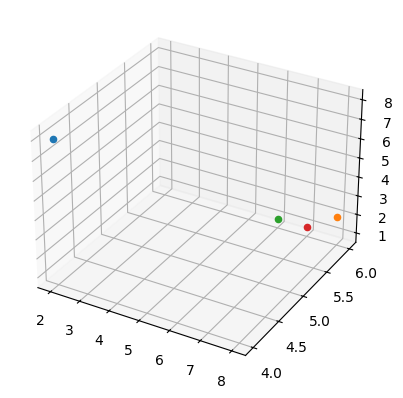

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for dot in dots:
    ax.scatter(*dot)

plt.show()

### 1.3.2 Задание

Создать 5x5 матрицу со значениями в строках от 0 до 4. Для создания 
необходимо использовать функцию arange.

In [7]:
np.array([np.arange(0, 5) for _ in range(5)])

array([[0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4]])

### 2.3.1 Задание

Для  предыдущего  примера  поэкспериментируйте  с  параметрами классификатора: 
1.  Установите другое количество ближайших соседей (k = 1, 5, 10). 
2.  Установите размер тестовой выборки 15% от всего датасета. 
3.  Постройте графики и оцените качество моделей, проанализируйте результаты. 

#### 2.2.1

В примере показано создание 2d-массива со значениями x и y. Список 
target  содержит  возможные  выходные  классы  (часто  называемые 
метками).  Далее  происходит  обучене  классификатора  k-ближайших 
соседей  по  исходным  данным.  Далее  производится  прогноз 
принадлежности к классам для двух точек данных.

In [25]:
# данные
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
target = [0, 0, 0, 1, 1, 1]

# обучаем модель k-ближайших соседей к данным
K = 3
model = KNeighborsClassifier(n_neighbors=K)
model.fit(X, target)
print(model)

# делаем прогноз
print('(-2,-2) is class', model.predict([[-9, 9]]))
print('(1,3) is class', model.predict([[1, 3]]))

KNeighborsClassifier(n_neighbors=3)
(-2,-2) is class [0]
(1,3) is class [1]


#### 2.2.2

Далее  приведем  более  наглядный  пример.  Будет  построена  граница 
решения для каждого класса. В качестве данных будем использовать уже 
знакомый нам и встроенный в библиотеку sklearn набор данных ирисов 
Фишера. Этот набор данных стал уже классическим, и часто используется 
в  литературе  для  иллюстрации  работы  различных  статистических 
алгоритмов.  Датасет  содержит  наблюдения  за  150  разными  цветками 
ирисов,  данные  по  каждому  цветку  расположены  в  строках.  В  стобцах 
записаны длина и ширина чашелистика, длина и ширина лепестка, вид 
ириса. 

In [9]:
url = 'https://raw.githubusercontent.com/akmand/datasets/master/iris.csv'

iris = pd.read_csv(url)

iris

sepal_length_cm  sepal_width_cm  petal_length_cm  petal_width_cm  \
0                5.1             3.5              1.4             0.2   
1                4.9             3.0              1.4             0.2   
2                4.7             3.2              1.3             0.2   
3                4.6             3.1              1.5             0.2   
4                5.0             3.6              1.4             0.2   
..               ...             ...              ...             ...   
145              6.7             3.0              5.2             2.3   
146              6.3             2.5              5.0             1.9   
147              6.5             3.0              5.2             2.0   
148              6.2             3.4              5.4             2.3   
149              5.9             3.0              5.1             1.8   

       species  
0       setosa  
1       setosa  
2       setosa  
3       setosa  
4       setosa  
..         ...  
145  virginica  
146  virginica  
147  virginica  
148  virginica  
149  virginica  

[150 rows x 5 columns]

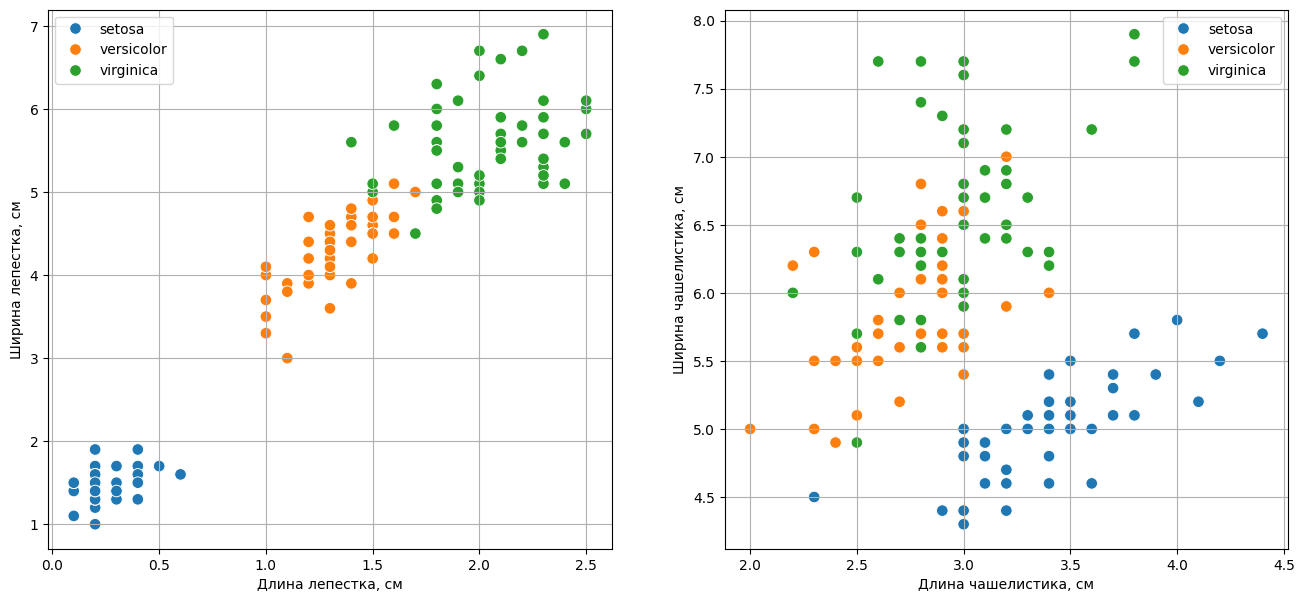

In [10]:
# Объявляем фигуру из двух графиков и ее размер 
plt.figure(figsize=(16, 7))

# Левый график
plt.subplot(121)
sns.scatterplot(
    data=iris, # из этой таблицы нарисовать точки
    x='petal_width_cm', y='petal_length_cm', # с этими координатами,
    hue='species', # для которых цвет определить согласно этому столбцу 
    s=70 # размер точек
)
plt.xlabel('Длина лепестка, см') 
plt.ylabel('Ширина лепестка, см') 
plt.legend() # добавить легенду 
plt.grid() # добавить сетку

# Правый график аналогично 
plt.subplot(122)
sns.scatterplot(data=iris,
x='sepal_width_cm', y='sepal_length_cm', hue='species', s=70)
plt.xlabel('Длина чашелистика, см') 
plt.ylabel('Ширина чашелистика, см') 
plt.legend()
plt.grid();

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    # поскольку iris это pandas-таблица, для нее нужно указывать iloc
    iris.iloc[:, :-1],  # берем все колонки кроме последней в признаки
    iris.iloc[:, -1],  # последнюю в целевую переменную (класс)
    test_size=0.15  # размер тестовой выборки 15%
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((127, 4), (23, 4), (127,), (23,))

In [12]:
X_train.head()

sepal_length_cm  sepal_width_cm  petal_length_cm  petal_width_cm
52               6.9             3.1              4.9             1.5
42               4.4             3.2              1.3             0.2
75               6.6             3.0              4.4             1.4
135              7.7             3.0              6.1             2.3
10               5.4             3.7              1.5             0.2

In [13]:
y_train.head()

52     versicolor
42         setosa
75     versicolor
135     virginica
10         setosa
Name: species, dtype: object

Обучим метод 1 ближайшем соседе

In [14]:
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train, y_train)

# Получим предсказания модели
y_pred = model.predict(X_test)
y_pred

array(['versicolor', 'setosa', 'virginica', 'setosa', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'virginica',
       'versicolor', 'setosa', 'virginica', 'setosa', 'virginica',
       'setosa', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'versicolor', 'setosa', 'setosa'], dtype=object)

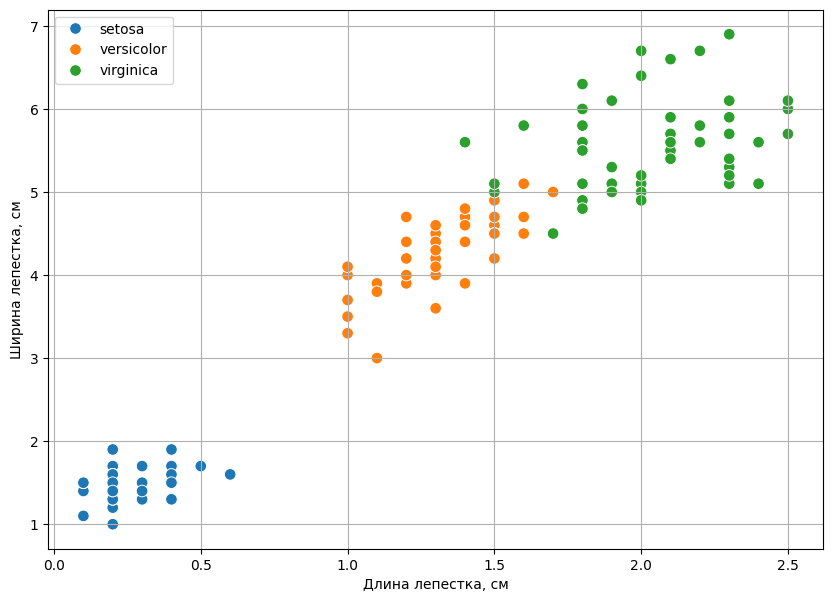

In [15]:
# Покажем на графике, что отражаем полученное число.
# Красным цветом обозначим точки, для которых классификация сработала неправильно.
plt.figure(figsize=(10, 7))
sns.scatterplot(x='petal_width_cm', y='petal_length_cm', data=iris, hue='species', s=70)
plt.xlabel('Длина лепестка, см')
plt.ylabel('Ширина лепестка, см')
plt.legend(loc=2)
plt.grid()

# Перебираем все объекты из теста
for i in range(len(y_test)):
    # Если предсказание неправильное
    if np.array(y_test)[i] != y_pred[i]:
        # то подсвечиваем точку красным
        plt.scatter(X_test.iloc[i, 3], X_test.iloc[i, 2], color='red', s=150)

In [16]:
# качество модели (доля правильно классифицированных точек)
print(f'accuracy: {accuracy_score(y_test, y_pred):.3f}')

accuracy: 1.000


Обучим метод 5 ближайших соседях

In [17]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

# Получим предсказания модели
y_pred = model.predict(X_test)
y_pred

array(['versicolor', 'setosa', 'virginica', 'setosa', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'virginica',
       'versicolor', 'setosa', 'virginica', 'setosa', 'virginica',
       'setosa', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'versicolor', 'setosa', 'setosa'], dtype=object)

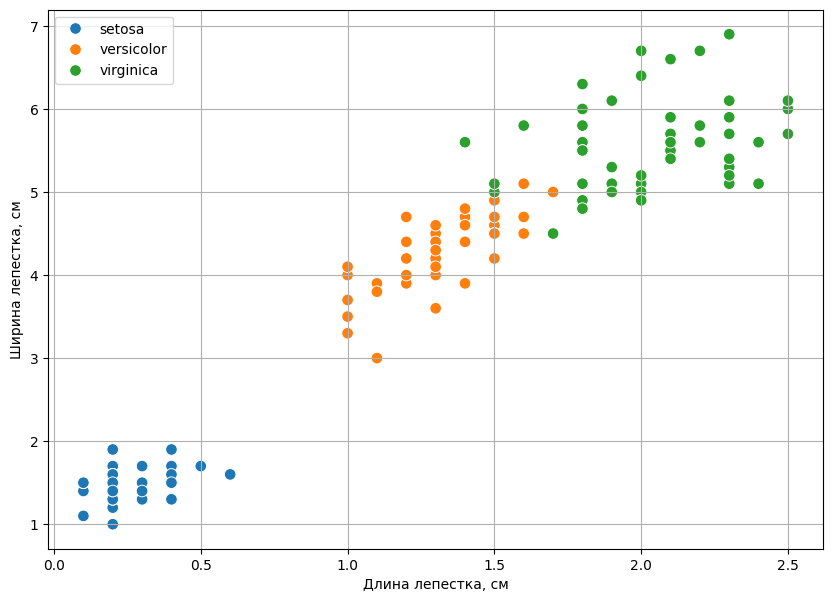

In [18]:
# Покажем на графике, что отражаем полученное число.
# Красным цветом обозначим точки, для которых классификация сработала неправильно.
plt.figure(figsize=(10, 7))
sns.scatterplot(x='petal_width_cm', y='petal_length_cm', data=iris, hue='species', s=70)
plt.xlabel('Длина лепестка, см')
plt.ylabel('Ширина лепестка, см')
plt.legend(loc=2)
plt.grid()

# Перебираем все объекты из теста
for i in range(len(y_test)):
    # Если предсказание неправильное
    if np.array(y_test)[i] != y_pred[i]:
        # то подсвечиваем точку красным
        plt.scatter(X_test.iloc[i, 3], X_test.iloc[i, 2], color='red', s=150)

In [19]:
# качество модели (доля правильно классифицированных точек)
print(f'accuracy: {accuracy_score(y_test, y_pred):.3f}')

accuracy: 1.000


Обучим метод 10 ближайших соседях

In [20]:
model = KNeighborsClassifier(n_neighbors=10)
model.fit(X_train, y_train)

# Получим предсказания модели
y_pred = model.predict(X_test)
y_pred

array(['versicolor', 'setosa', 'virginica', 'setosa', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'virginica',
       'versicolor', 'setosa', 'virginica', 'setosa', 'virginica',
       'setosa', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'versicolor', 'setosa', 'setosa'], dtype=object)

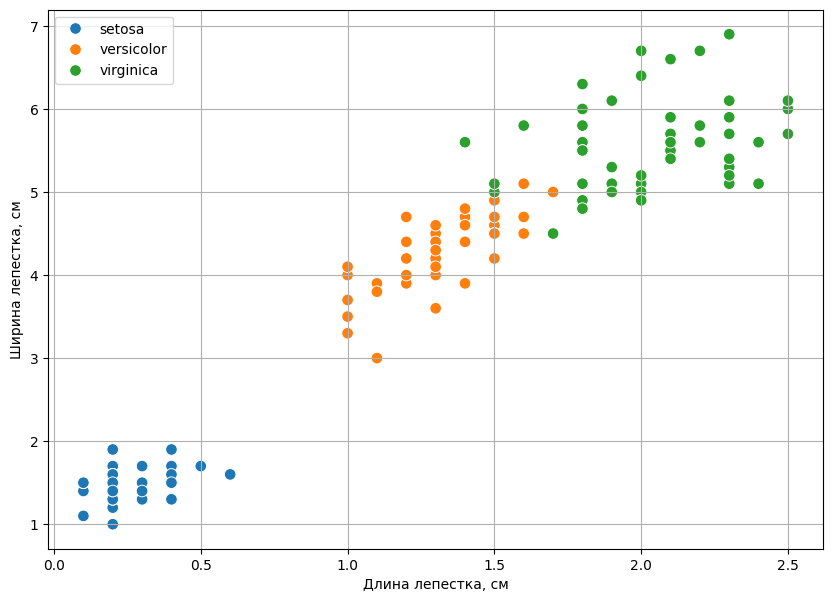

In [21]:
# Покажем на графике, что отражаем полученное число.
# Красным цветом обозначим точки, для которых классификация сработала неправильно.
plt.figure(figsize=(10, 7))
sns.scatterplot(x='petal_width_cm', y='petal_length_cm', data=iris, hue='species', s=70)
plt.xlabel('Длина лепестка, см')
plt.ylabel('Ширина лепестка, см')
plt.legend(loc=2)
plt.grid()

# Перебираем все объекты из теста
for i in range(len(y_test)):
    # Если предсказание неправильное
    if np.array(y_test)[i] != y_pred[i]:
        # то подсвечиваем точку красным
        plt.scatter(X_test.iloc[i, 3], X_test.iloc[i, 2], color='red', s=150)

In [22]:
# качество модели (доля правильно классифицированных точек)
print(f'accuracy: {accuracy_score(y_test, y_pred):.3f}')

accuracy: 1.000


### 3.3.2 Задание

Определите набор признаков человека, по аналогии из РТ 1, – например, 
цвет глаз и конвертируйте его в матрицу признаков. 

In [23]:
data_dict = [{"карий": 3,   "голубой":2, "серый":1}, 
             {"карий": 1,   "зеленый":1, "серый":1},
             {"зеленый": 3, "голубой":5, "серый":5},
             {"карий": 2,   "голубой":3, "зеленый":4}]

dictvectoriser = DictVectorizer(sparse=False)

features = dictvectoriser.fit_transform(data_dict)
features

array([[2., 0., 3., 1.],
       [0., 1., 1., 1.],
       [5., 3., 0., 5.],
       [3., 4., 2., 0.]])